## Titanic Veri Analizi

In [1]:
#1. Kütüphaneleri Yükle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#2. Veri setlerini yükle
df_train=pd.read_csv(r'/kaggle/input/titanic/train.csv')
df_test=pd.read_csv(r'/kaggle/input/titanic/test.csv')
df_train,df_test

(     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

3. Veri Önişleme
* Keşifsel Veri Analizi (EDA)
* Veri Görselleştirme
* Eksik verilerin işlenmesi
* Özellik Drop, Çıkarımı, ve Dönüştürme
* Veri setinin (X-y) ayrılması
* Veri setinin eğitim-doğrulama-test olarak ayrılması

In [3]:
# df_train ve df_test birleştir
df=pd.concat([df_train,df_test])

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

In [6]:
df.reset_index(inplace=True)

In [7]:
df.drop('index', axis=1, inplace=True)

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
#genel veri seti hakkında bilgi 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [10]:
#eksik verilerin kontrolü
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [11]:
# betimsel istatistikler
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [12]:
df['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

In [13]:
df['Survived'].value_counts(normalize=True)


Survived
0.0    0.616162
1.0    0.383838
Name: proportion, dtype: float64

<Axes: xlabel='Survived'>

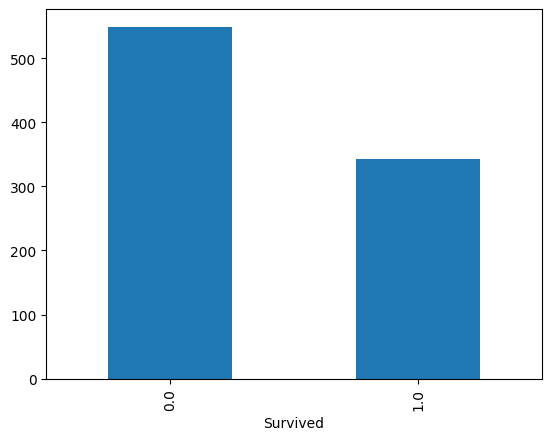

In [14]:
df['Survived'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Survived durumu kişi sayısı')

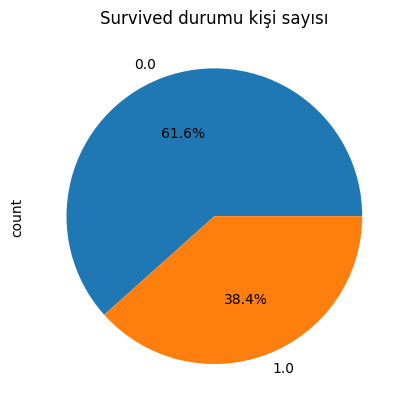

In [15]:
df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Survived durumu kişi sayısı')

In [16]:
#Cinsiyete göre dağılım
df['Sex'].value_counts()

Sex
male      843
female    466
Name: count, dtype: int64

In [17]:
df['Sex'].value_counts(normalize=True)

Sex
male      0.644003
female    0.355997
Name: proportion, dtype: float64

<Axes: title={'center': 'Cinsiyete Göre Dağılım'}, ylabel='ooo'>

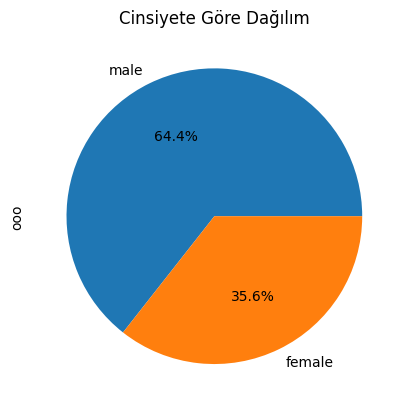

In [18]:
df['Sex'].value_counts().plot(kind='pie',
                             autopct='%1.1f%%',
                             title='Cinsiyete Göre Dağılım',
                             ylabel='ooo')

In [19]:
#Kadın ve erkeklerin hayatta kalma duıumları
df_female=df[df['Sex']=='female']
#df_female

In [20]:
df_female['Survived'].value_counts()

Survived
1.0    233
0.0     81
Name: count, dtype: int64

<Axes: title={'center': 'kadınlarda kurtulma oranı '}, ylabel='count'>

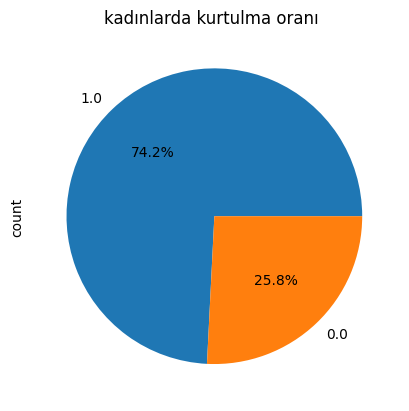

In [21]:
df_female['Survived'].value_counts().plot(kind='pie',
                                         autopct='%1.1f%%',
                                         title='kadınlarda kurtulma oranı ')

<Axes: title={'center': 'erkeklerde kurtulma oranı '}, ylabel='count'>

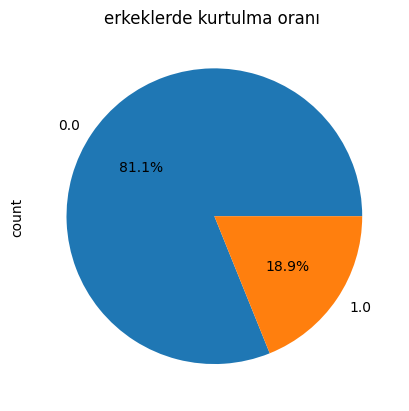

In [22]:
df_male=df[df['Sex']=='male']
df_male['Survived'].value_counts().plot(kind='pie',
                                         autopct='%1.1f%%',
                                         title='erkeklerde kurtulma oranı ')

<Axes: xlabel='Sex', ylabel='count'>

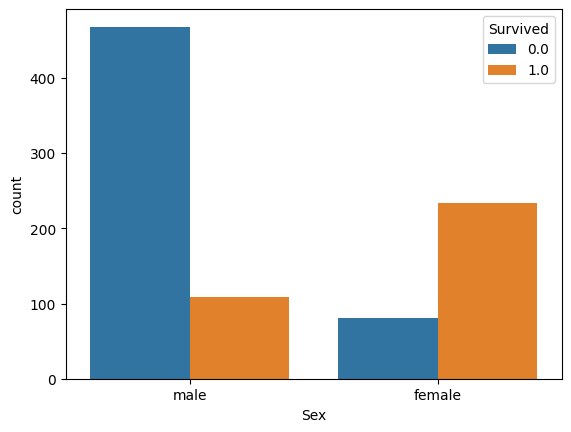

In [23]:
sns.countplot(df,x='Sex', 
              hue='Survived')

In [24]:
#Yolculuk sınıflarına göre inceleme
df['Pclass'].unique()

array([3, 1, 2])

In [25]:
df['Pclass'].value_counts()

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

<Axes: title={'center': 'Yolculuk sınıfları'}, ylabel='count'>

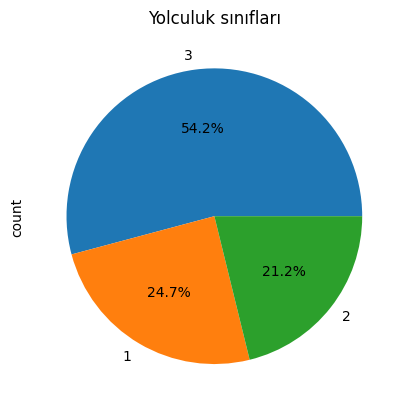

In [26]:
df['Pclass'].value_counts().plot(kind='pie',
                                autopct='%1.1f%%',
                                title='Yolculuk sınıfları')


In [27]:
#Pclass-Survived ilişkisi
df.groupby('Pclass')['Survived'].value_counts(normalize=True)

Pclass  Survived
1       1.0         0.629630
        0.0         0.370370
2       0.0         0.527174
        1.0         0.472826
3       0.0         0.757637
        1.0         0.242363
Name: proportion, dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

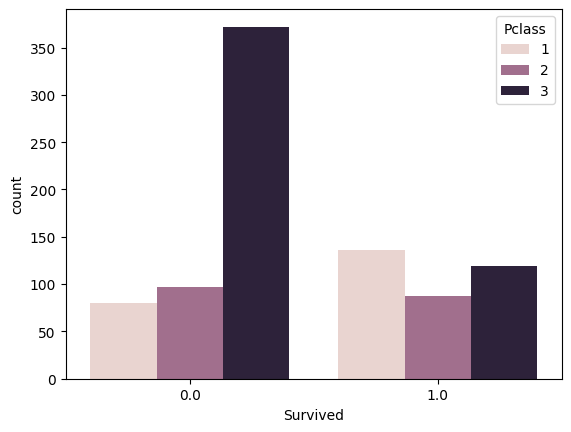

In [28]:
sns.countplot(x='Survived',
             hue='Pclass',
             data=df)

In [29]:
#P class Cinsiyeti
df.groupby(['Pclass','Sex'])['Survived'].value_counts(normalize=True)


Pclass  Sex     Survived
1       female  1.0         0.968085
                0.0         0.031915
        male    0.0         0.631148
                1.0         0.368852
2       female  1.0         0.921053
                0.0         0.078947
        male    0.0         0.842593
                1.0         0.157407
3       female  0.0         0.500000
                1.0         0.500000
        male    0.0         0.864553
                1.0         0.135447
Name: proportion, dtype: float64

In [30]:
df.groupby(['Pclass','Sex'])['Survived'].value_counts()

Pclass  Sex     Survived
1       female  1.0          91
                0.0           3
        male    0.0          77
                1.0          45
2       female  1.0          70
                0.0           6
        male    0.0          91
                1.0          17
3       female  0.0          72
                1.0          72
        male    0.0         300
                1.0          47
Name: count, dtype: int64

In [31]:
#Pclass 1 deki bu hayatanı kaybeden 3 kadının ismini istiyorum.
df_ozel=df[(df['Pclass']==1)& (df['Sex']=='female')& (df['Survived']==0)]['Name']

In [32]:
df_ozel

177                         Isham, Miss. Ann Elizabeth
297                       Allison, Miss. Helen Loraine
498    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
Name: Name, dtype: object

In [33]:
#hayatını kaybeden 1. sınıfta yol kadın name ve age
df[(df['Pclass']==1)& (df['Sex']=='female')& (df['Survived']==0)][['Name','Age']]


,Name,Age
177,"Isham, Miss. Ann Elizabeth",50.0
297,"Allison, Miss. Helen Loraine",2.0
498,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0


In [34]:
#Toplam
df[(df['Pclass']==1)& (df['Sex']=='female')& (df['Survived']==0)]['Name'].value_counts().sum()

np.int64(3)

In [35]:
len(df[(df['Pclass']==1)& (df['Sex']=='female')& (df['Survived']==0)])

3

In [36]:
#5 yaşın altında hayatını kaybeden çocuklar
df[(df['Age']<=5)& (df['Survived']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
16,17,0.0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
63,64,0.0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S
119,120,0.0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
164,165,0.0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
171,172,0.0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,NaN,Q
205,206,0.0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
297,298,0.0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
374,375,0.0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.0750,NaN,S
386,387,0.0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S


In [37]:
len(df[(df['Age']<=5)& (df['Survived']==0)])

13

In [38]:
# en yaşlı yolcuyu bul
df['Age'].max()


80.0

In [39]:
df[df['Age']==df['Age'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1.0,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [40]:
# en genç yolcu 
df[df['Age']==df['Age'].min()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1245,1246,NaN,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.575,NaN,S


In [41]:
# DF üzerinde ism ile arama yapma
#name=input ('Aranacak kişini adını giriniz: ')
#df[df['Name'].str.contains(name,case=False)]

In [42]:
#def arama(name):
 #   if len(df[df['Name'].str.contains(name,case=False)])>0:
     #   return True,len(df[df['Name'].str.contains(name,case=False)])
   # else: return False,0

In [43]:
#arama(input ('Aranacak kişini adını giriniz: '))

In [44]:
#12 yaş altı hayatta kalma oranını bul
df[(df['Age']<=12)]['Survived'].value_counts()

Survived
1.0    40
0.0    29
Name: count, dtype: int64

In [45]:
df[(df['Age']<=12)]['Survived'].value_counts(normalize=True)

Survived
1.0    0.57971
0.0    0.42029
Name: proportion, dtype: float64

In [46]:
df_cocuk=df_train[(df_train['Age']<=12)]
df_cocuk[df_cocuk['Survived']==0][['Name','Age','Survived', 'Pclass']]

,Name,Age,Survived,Pclass
7,"Palsson, Master. Gosta Leonard",2.0,0,3
16,"Rice, Master. Eugene",2.0,0,3
24,"Palsson, Miss. Torborg Danira",8.0,0,3
50,"Panula, Master. Juha Niilo",7.0,0,3
59,"Goodwin, Master. William Frederick",11.0,0,3
63,"Skoog, Master. Harald",4.0,0,3
119,"Andersson, Miss. Ellis Anna Maria",2.0,0,3
147,"Ford, Miss. Robina Maggie ""Ruby""",9.0,0,3
164,"Panula, Master. Eino Viljami",1.0,0,3
171,"Rice, Master. Arthur",4.0,0,3


In [47]:
df_cocuk['Pclass'].value_counts()

Pclass
3    48
2    17
1     4
Name: count, dtype: int64

In [48]:
df[(df['Age']<=12)].groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1.0          3
        0.0          1
2       1.0         17
3       0.0         28
        1.0         20
Name: count, dtype: int64

In [49]:
df.groupby('Pclass')['Survived'].value_counts(normalize=True)

Pclass  Survived
1       1.0         0.629630
        0.0         0.370370
2       0.0         0.527174
        1.0         0.472826
3       0.0         0.757637
        1.0         0.242363
Name: proportion, dtype: float64

In [50]:
df_train['Pclass'].value_counts() # Train ve test verisi dahil 

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [51]:
df_cocuk['Pclass'].value_counts()

Pclass
3    48
2    17
1     4
Name: count, dtype: int64

In [52]:
#limanlara göre dağılım 
df_train['Embarked'].value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

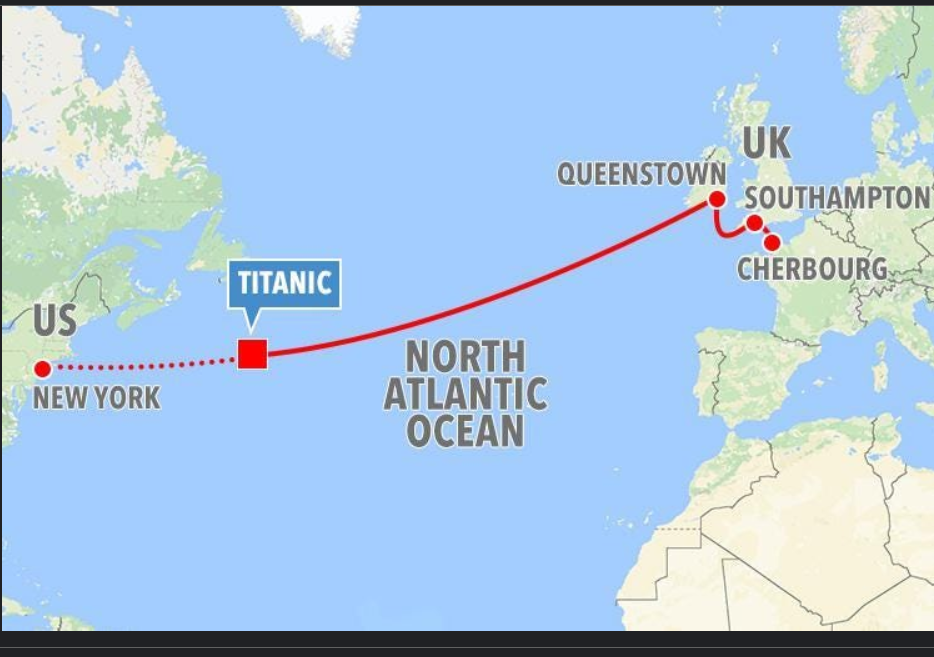

Text(0.5, 1.0, 'Limanlara göre Yolcu Dağılımı')

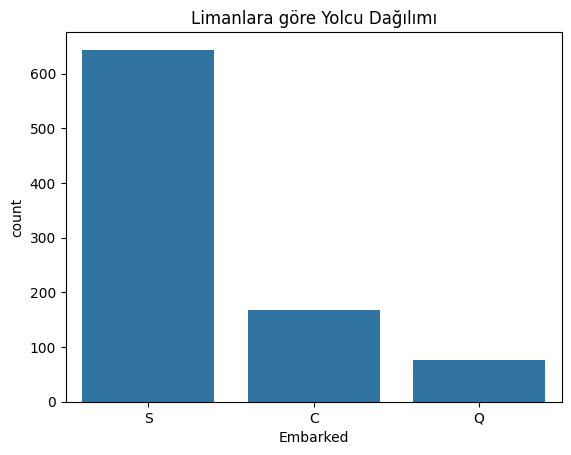

In [53]:
sns.countplot(data=df_train, x='Embarked')
plt.title('Limanlara göre Yolcu Dağılımı')

In [54]:
df_train[(df_train['Parch']==df_train['Parch'].max())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S


In [55]:
df[(df['Parch']==df['Parch'].max())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1233,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
1256,1257,NaN,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.55,NaN,S


In [56]:
len(df[df['Name'].str.contains('Sage')])

12

In [57]:
df[df['Name'].str.contains('Sage')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
641,642,1.0,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
1079,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
1233,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S


Titanic’e bilet alıp gemiye binemeyen ve bu sayede faciadan kurtulan Türk, kadın doğum uzmanı Prof. Dr. Besim Ömer Akalın’dır.
​

Kimdir?
Besim Ömer Akalın, Osmanlı döneminin önde gelen hekimlerinden, Türkiye’de modern doğum hastaneleri ve ebeliğin kurumsallaşmasında önemli rol oynayan bir tıp profesörüdür.
​

In [58]:
df['Parch'].value_counts()

Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64

In [59]:
df.groupby(['Pclass','Parch'])['Survived'].value_counts()

Pclass  Parch  Survived
1       0      1.0          99
               0.0          64
        1      1.0          21
               0.0          10
        2      1.0          16
               0.0           5
        4      0.0           1
2       0      0.0          86
               1.0          48
        1      1.0          24
               0.0           8
        2      1.0          13
               0.0           3
        3      1.0           2
3       0      0.0         295
               1.0          86
        1      0.0          35
               1.0          20
        2      0.0          32
               1.0          11
        3      0.0           2
               1.0           1
        4      0.0           3
        5      0.0           4
               1.0           1
        6      0.0           1
Name: count, dtype: int64

In [60]:
df.groupby(['Pclass','Parch'])['Survived'].value_counts(normalize=True)


Pclass  Parch  Survived
1       0      1.0         0.607362
               0.0         0.392638
        1      1.0         0.677419
               0.0         0.322581
        2      1.0         0.761905
               0.0         0.238095
        4      0.0         1.000000
2       0      0.0         0.641791
               1.0         0.358209
        1      1.0         0.750000
               0.0         0.250000
        2      1.0         0.812500
               0.0         0.187500
        3      1.0         1.000000
3       0      0.0         0.774278
               1.0         0.225722
        1      0.0         0.636364
               1.0         0.363636
        2      0.0         0.744186
               1.0         0.255814
        3      0.0         0.666667
               1.0         0.333333
        4      0.0         1.000000
        5      0.0         0.800000
               1.0         0.200000
        6      0.0         1.000000
Name: proportion, dtype: float64

In [61]:
# Sınıf ve aile büyüklüğüne göre ölen kişi sayısı, hayatta kalma oranı ve toplam aile sayısı
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
summary = df_train.groupby(['Pclass', 'FamilySize'])['Survived'].agg(['count', 'sum'])
summary['Died'] = summary['count'] - summary['sum']
summary['SurvivalRate'] = summary['sum'] / summary['count']
summary['TotalFamilies'] = summary['count']
print(summary[['TotalFamilies', 'Died', 'SurvivalRate']])

                   TotalFamilies  Died  SurvivalRate
Pclass FamilySize                                   
1      0                     109    51      0.532110
       1                      70    19      0.728571
       2                      24     6      0.750000
       3                       7     2      0.714286
       4                       2     0      1.000000
       5                       4     2      0.500000
2      0                     104    68      0.346154
       1                      34    16      0.529412
       2                      31    10      0.677419
       3                      13     3      0.769231
       4                       1     0      1.000000
       5                       1     0      1.000000
3      0                     324   255      0.212963
       1                      57    37      0.350877
       2                      47    27      0.425532
       3                       9     3      0.666667
       4                      12    12      0.

In [62]:
df['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [63]:
#unvanları al
df['Title']=df['Name'].str.extract('([A-Za-z]+)\.')
df['Title']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Title, Length: 1309, dtype: object

In [64]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [65]:
df['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Mlle          2
Ms            2
Mme           1
Don           1
Sir           1
Lady          1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [66]:
df['Title_group']=df['Title']
df['Title_group']=df['Title_group'].replace(['Ms','Mlle'],'Miss')
df['Title_group']=df['Title_group'].replace(['Mme','Countess','Lady','Dona'], 'Mrs')
df['Title_group']=df['Title_group'].replace(['Capt','Col','Don','Dr', 'Major','Rev', 'Sir', 'Jonkheer'],'Mr')
df['Title_group'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [67]:
df['Title_group'].value_counts()

Title_group
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Title        1309 non-null   object 
 13  Title_group  1309 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [69]:
df['Age'].isnull().sum()
#eksik veri sayısı 

np.int64(263)

In [70]:
df['Age'].mean(),df['Age'].median()

(np.float64(29.881137667304014), 28.0)

In [71]:
df.groupby('Title_group')['Age'].mean(), df.groupby('Title_group')['Age'].max(),df.groupby('Title_group')['Age'].min() 

(Title_group
 Master     5.482642
 Miss      21.824366
 Mr        32.811056
 Mrs       36.971264
 Name: Age, dtype: float64,
 Title_group
 Master    14.5
 Miss      63.0
 Mr        80.0
 Mrs       76.0
 Name: Age, dtype: float64,
 Title_group
 Master     0.33
 Miss       0.17
 Mr        11.00
 Mrs       14.00
 Name: Age, dtype: float64)

In [72]:
df.groupby('Title_group')['Age'].median()

Title_group
Master     4.0
Miss      22.0
Mr        30.0
Mrs       35.5
Name: Age, dtype: float64

In [73]:
df['Age']=df['Age'].fillna(df.groupby('Title_group')['Age'].transform('median'))

In [74]:
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
1309 non-null   float64
dtypes: float64(1)
memory usage: 10.4 KB


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Title        1309 non-null   object 
 13  Title_group  1309 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [76]:
df['Fare'].median()

14.4542

In [77]:
df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [78]:
df['Fare'].isnull().sum()

np.int64(0)

In [79]:
df['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [80]:
df['Embarked'].fillna('S',inplace=True)
df['Embarked'].isnull().sum()

np.int64(0)

In [81]:
#veri setini özlelikle vce sonuç veya etiket sınıf 
y=df['Survived'] # y=f(X)
X=df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Title_group' ]]

In [82]:
y

0       0.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
1304    NaN
1305    NaN
1306    NaN
1307    NaN
1308    NaN
Name: Survived, Length: 1309, dtype: float64

In [83]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_group
0,3,male,22.0,1,0,7.2500,S,Mr
1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,female,26.0,0,0,7.9250,S,Miss
3,1,female,35.0,1,0,53.1000,S,Mrs
4,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...
1304,3,male,30.0,0,0,8.0500,S,Mr
1305,1,female,39.0,0,0,108.9000,C,Mrs
1306,3,male,38.5,0,0,7.2500,S,Mr
1307,3,male,30.0,0,0,8.0500,S,Mr


In [84]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# 1. VERİLERİ YÜKLE
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

# 2. BASİT BİR MODEL EĞİT (Hata almamak için)
y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

# 3. TAHMİN ET VE KAYDET
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

print("İşlem Başarılı! Dosyanız 'submission.csv' olarak kaydedildi.")

İşlem Başarılı! Dosyanız 'submission.csv' olarak kaydedildi.
